# **CA#1**
# Fereshte Bagheri
SID: 810100089



***Q1:***

The function below creates m binomial distributions, each comprising n trials with a probability of success of p.

In [ ]:
import numpy as np

def sample_from_binomial(p, n, m):
    bernoulli_samples = np.random.choice([0, 1], size=(m, n), p=[1-p, p])
    binomial_samples = np.sum(bernoulli_samples, axis=1)
    return binomial_samples


The following example demonstrates the sampling function output. It generates 8 samples from a binomial distribution, where each sample consists of 5 trials, and returns the number of successful trials in each sample.

In [ ]:
s = sample_from_binomial(0.6, 5,8);
print(s)

[5 1 2 3 2 4 3 4]


In this section, 5000 samples are generated, and the means and variances for each p are calculated based on the samples and using their respective formulas.

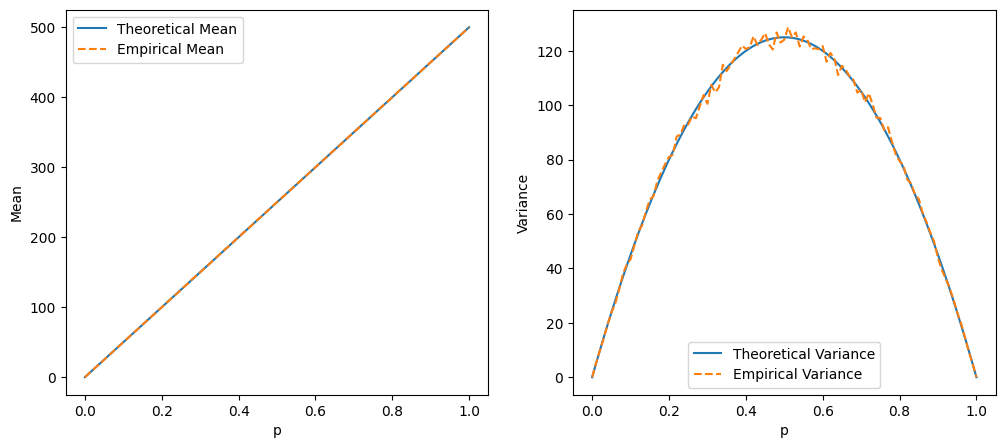

In [ ]:
import matplotlib.pyplot as plt
n = 500
num_samples = 5000

empirical_means = []
empirical_variances = []
p_values = np.linspace(0, 1, 101)
for p in p_values:
    samples = sample_from_binomial(p, n, num_samples)
    empirical_means.append(np.mean(samples))
    empirical_variances.append(np.var(samples))

theoretical_means = n * p_values
theoretical_variances = n * p_values * (1 - p_values)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(p_values, theoretical_means, label='Theoretical Mean')
plt.plot(p_values, empirical_means, label='Empirical Mean', linestyle='dashed')
plt.xlabel('p')
plt.ylabel('Mean')
plt.legend()

plt.subplot(1,2, 2)
plt.plot(p_values, theoretical_variances, label='Theoretical Variance')
plt.plot(p_values, empirical_variances, label='Empirical Variance', linestyle='dashed')
plt.xlabel('p')
plt.ylabel('Variance')
plt.legend()

plt.show()


As evident from the above diagrams, both the theoretical and empirical means are identical. Additionally, while there are slight discrepancies between the theoretical and empirical variances at certain points, they are approximately equal.

The amount of discrepancies between empirical and theoretical variances is greater when p is near 0.5 compared to when it is near 0 or 1. This is due to the nature of the binomial distribution. When p is near 0.5, the distribution is more spread out, leading to larger variations in the empirical results compared to the theoretical expectations. This phenomenon occurs because the binomial distribution is more sensitive to changes in the probability of success when p is close to 0.5.

***Q2:***

To compare which distribution, normal or Poisson, is a better approximation for the binomial distribution when ( p = 0.008 ), we can draw the graphs of the probability density function (PDF) and cumulative distribution function (CDF) for these three distributions and compare them. Here's the code to achieve this:

note:

The binomial and Poisson distributions are discrete probability distributions, and as such, they have a probability mass function (PMF) rather than a probability density function (PDF). The PMF gives the probability that a discrete random variable is exactly equal to some value.
On the other hand, the normal distribution is a continuous probability distribution and has a probability density function (PDF) rather than a probability mass function (PMF). The PDF represents the relative likelihood of the random variable taking on a particular value.
Therefore, when comparing the binomial and Poisson distributions to the normal distribution, it's more appropriate to compare their PMFs to the normal distribution's PDF, and their CDFs to the normal distribution's CDF.


The Poisson approximation of the binomial distribution is better when ( p ) is near 1 or 0 because the Poisson distribution is well-suited for modeling rare events, which occur with low probability. In the limit as ( n ) (the number of trials) goes to infinity and ( p ) goes to 0 (or 1), the binomial distribution approaches the Poisson distribution. This is because in these cases, the events of interest become rare, and the Poisson distribution is a good approximation for rare events.
On the other hand, the normal approximation of the binomial distribution is better when ( p ) is near 0.5 because the binomial distribution is symmetric around ( p = 0.5 ), and the shape of the binomial distribution becomes more bell-shaped as ( p ) approaches 0.5. This makes it more amenable to approximation by the normal distribution, which is also bell-shaped and symmetric.

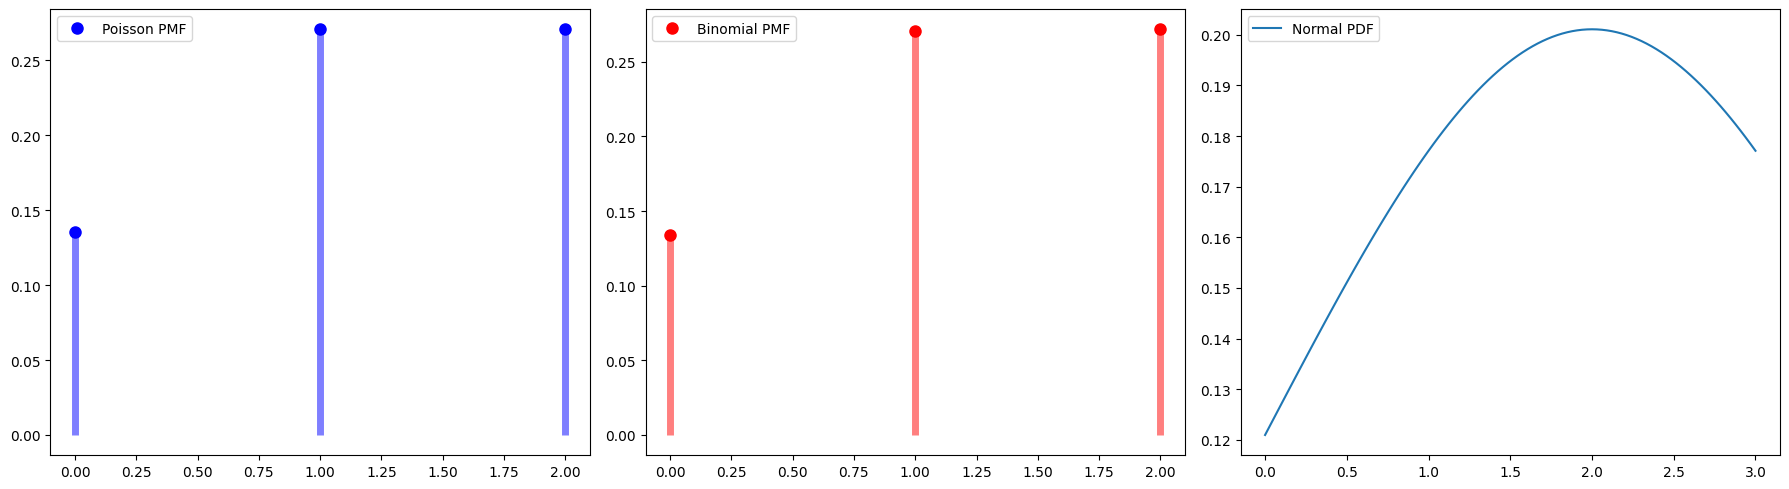

In [ ]:
from scipy.stats import poisson, binom, norm

n = 250
p = 0.008
lambda_ = 2
x = np.arange(0, 3)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(x, poisson.pmf(x, lambda_), 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson.pmf(x, lambda_), colors='b', lw=5, alpha=0.5)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, binom.pmf(x, n, p), 'ro', ms=8, label='Binomial PMF')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
plt.legend()

plt.subplot(1, 3, 3)
x_norm = np.linspace(0, 3, 100)
plt.plot(x_norm, norm.pdf(x_norm, 2, 1.984), label='Normal PDF')
plt.legend()

plt.tight_layout()
plt.show()

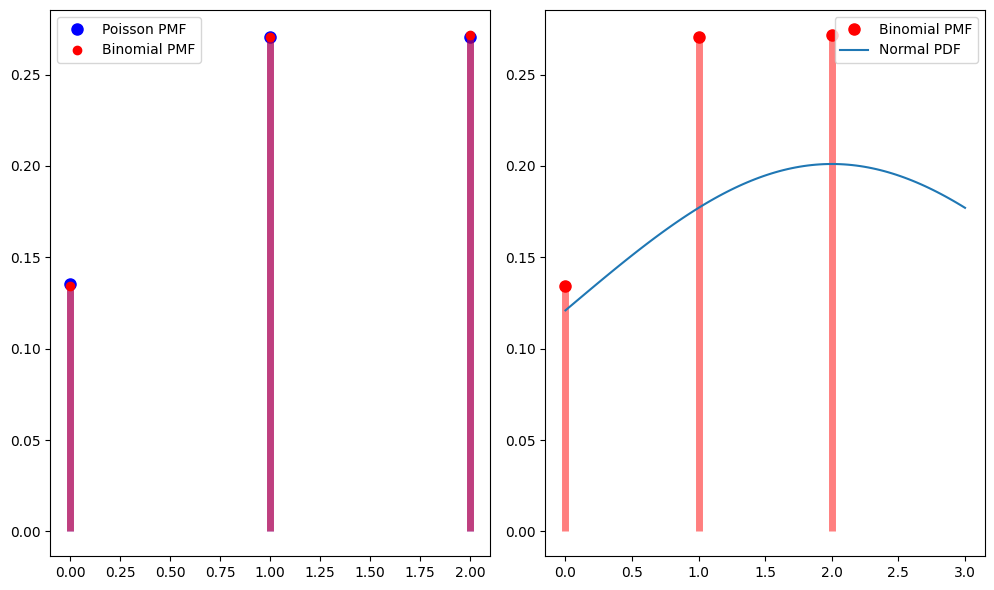

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, binom, norm

n = 250
p = 0.008
lambda_ = 2
x = np.arange(0, 3)

# PDF comparison
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.plot(x, poisson.pmf(x, lambda_), 'bo', ms=8, label='Poisson PMF')
plt.vlines(x, 0, poisson.pmf(x, lambda_), colors='b', lw=5, alpha=0.5)

plt.plot(x, binom.pmf(x, n, p), 'ro', ms=6, label='Binomial PMF')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, binom.pmf(x, n, p), 'ro', ms=8, label='Binomial PMF')
plt.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
x_norm = np.linspace(0, 3, 100)
plt.plot(x_norm, norm.pdf(x_norm, 2, 1.984), label='Normal PDF')
plt.legend()

# plt.subplot(1, 3, 3)

# plt.legend()

plt.tight_layout()
plt.show()


According to the above diagrams, it is evident that the binomial and normal distributions' PDFs exhibit significant differences at each point. However, the binomial and Poisson distributions' PMFs are remarkably similar.

Therefore, we have determined that the Poisson distribution provides a better approximation to the binomial distribution in this example.

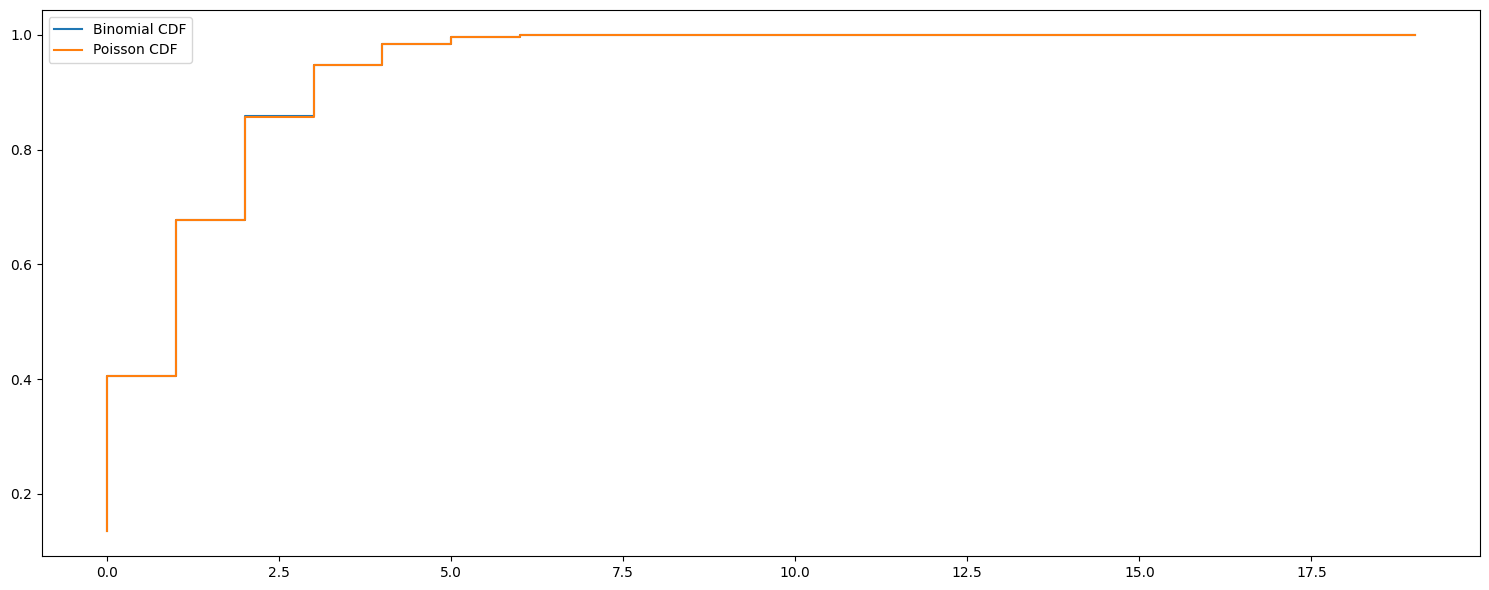

In [ ]:
x = np.arange(0, 20)
x_norm = np.linspace(0, 20, 100)

plt.figure(figsize=(15, 6))
plt.subplot(1, 1, 1)
plt.step(x, binom.cdf(x, n, p), label='Binomial CDF')
plt.step(x, poisson.cdf(x, lambda_), label='Poisson CDF')

plt.legend()
plt.tight_layout()
plt.show()

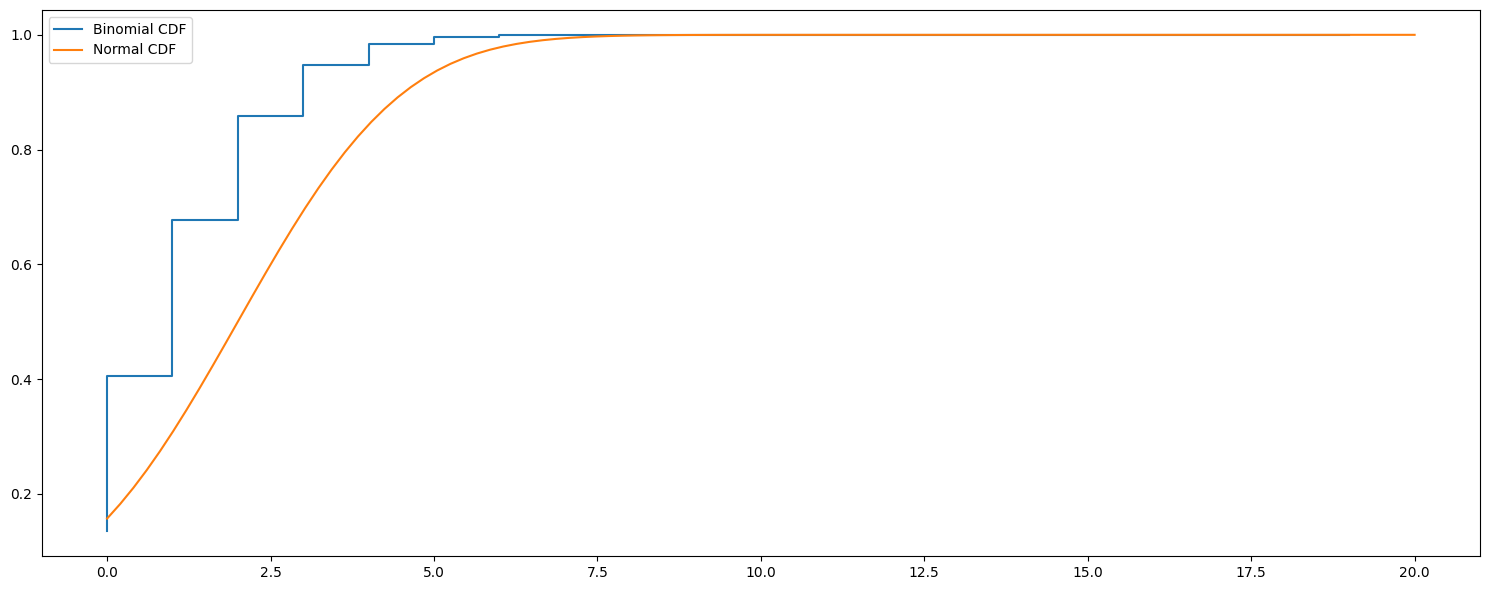

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 1, 1)
plt.step(x, binom.cdf(x, n, p), label='Binomial CDF')
plt.plot(x_norm, norm.cdf(x_norm, 2, 1.984), label='Normal CDF')

plt.legend()
plt.tight_layout()
plt.show()



To further support this conclusion, we can compare the cumulative distribution functions (CDFs) of the normal and Poisson distributions with that of the binomial distribution. This comparison will provide additional evidence that, in this example, the Poisson approximation of the binomial distribution is superior.

***Q3:***

1. To find the minimum score for a student to be in the top 10% of the class, we can use the percentile point function (PPF) of the normal distribution.
The PPF gives the value x such that the probability of a random variable being less than or equal to x is equal to a given probability p.

In [ ]:
import scipy.stats as stats

mean = 80
sigma = 12

top_10_percent_score = stats.norm.ppf(0.9, loc=mean, scale=sigma)
print(top_10_percent_score)


95.3786187865352


2. To find the range of scores that fall within the second and third quartiles, we can use the PPF of the normal distribution. The second quartile corresponds to the median, and the third quartile corresponds to the 75th percentile.

In [ ]:
second_quartile_score = stats.norm.ppf(0.5, loc=mean, scale=sigma)
third_quartile_score = stats.norm.ppf(0.75, loc=mean, scale=sigma)

print("Second Quartile Score (Median):", second_quartile_score)
print("Third Quartile Score:", third_quartile_score)

Second Quartile Score (Median): 80.0
Third Quartile Score: 88.09387700235298


3. In this question we can use CDF function of normal disterbution.

In [ ]:
between_80_and_90 = stats.norm.cdf(90, loc=mean, scale=sigma) - stats.norm.cdf(80, loc=mean, scale=sigma)
print("P{80 < X < 90}:", between_80_and_90)


P{80 < X < 90}: 0.29767161903635686


4.

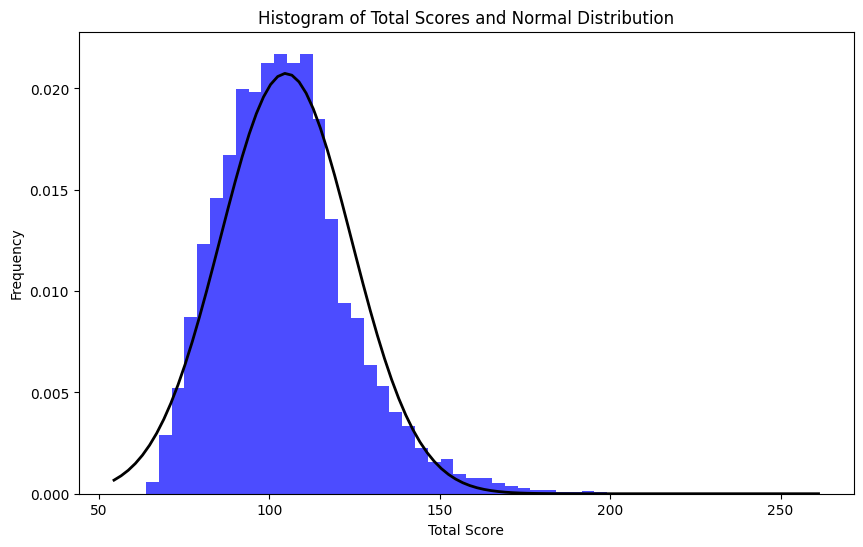

In [ ]:
from scipy.stats import uniform, expon, poisson

num_samples = 10000

physics_scores = uniform.rvs(loc=50, scale=40, size=num_samples)  # Uniform distribution => X ~ U(50,90)
programming_scores = expon.rvs(scale=15, size=num_samples)  # Exponential distribution => Y ~ exp(15)
math_scores = poisson.rvs(mu=20, size=num_samples)  # Poisson distribution => W ~ poi(20)

total_scores = physics_scores + programming_scores + math_scores

plt.figure(figsize=(10, 6))
plt.hist(total_scores, bins=50, density=True, alpha=0.7, color='b')

mu = np.mean(total_scores)
sigma = np.std(total_scores)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram of Total Scores and Normal Distribution')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()


***Q4:***

Similar to question 2 the graphs are drawn. it is clear that the normal and binomial distributions are similar, while the Poisson distribution does not align well. The difference between this observation and the one in question 2 is attributed to the value of \( p \). The complete explanation for this difference has been provided earlier.

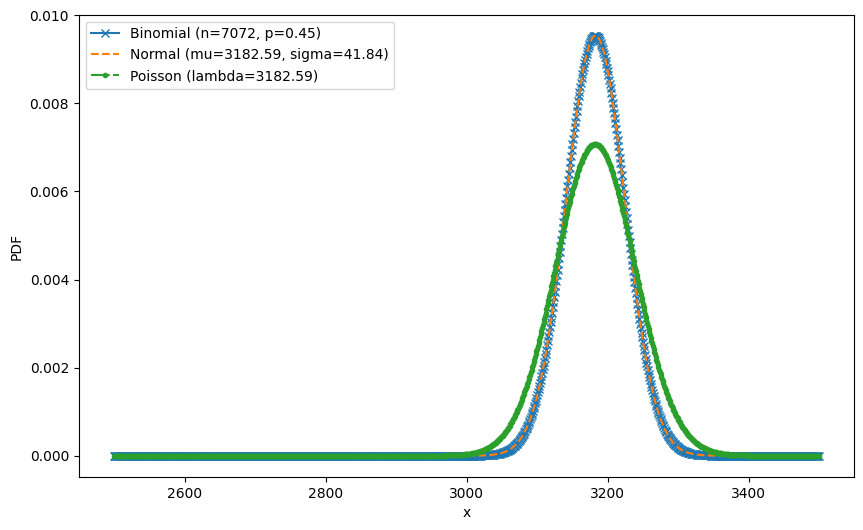

In [ ]:
n = 7072
p = 0.45
mu = 3182.59
sigma = 41.84
lambda_ = 3182.59

x = np.arange(2500, 3500)
pdf_binom = binom.pmf(x, n, p)
pdf_norm = norm.pdf(x, mu, sigma)
pdf_poisson = poisson.pmf(x, lambda_)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_binom, label='Binomial (n={}, p={})'.format(n, p), marker='x', linestyle='-')
plt.plot(x, pdf_norm, label='Normal (mu={}, sigma={})'.format(mu, sigma), linestyle='--')
plt.plot(x, pdf_poisson, label='Poisson (lambda={})'.format(lambda_), marker='.', linestyle='-.')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()


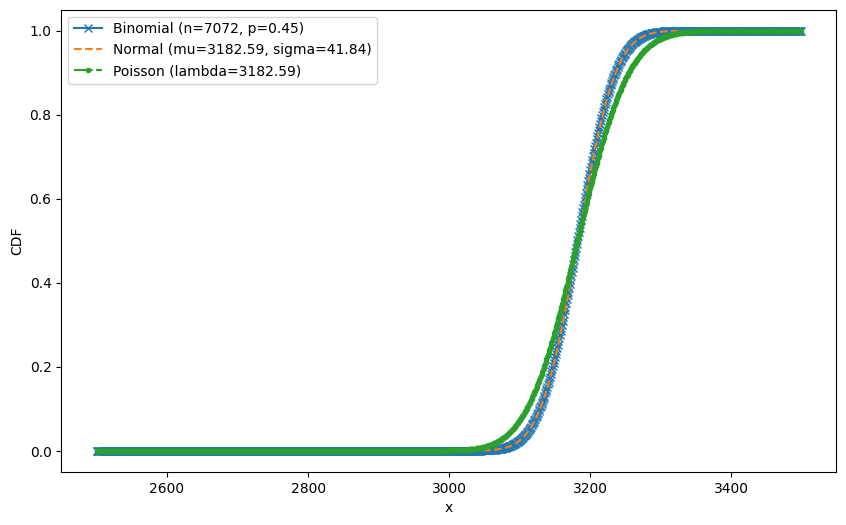

In [ ]:
pdf_binom = binom.cdf(x, n, p)
pdf_norm = norm.cdf(x, mu, sigma)
pdf_poisson = poisson.cdf(x, lambda_)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf_binom, label='Binomial (n={}, p={})'.format(n, p), marker='x', linestyle='-')
plt.plot(x, pdf_norm, label='Normal (mu={}, sigma={})'.format(mu, sigma), linestyle='--')
plt.plot(x, pdf_poisson, label='Poisson (lambda={})'.format(lambda_), marker='.', linestyle='-.')
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.show()
